In [1]:
1729

1729

# Assessing Climate Resiliency for Agricultural Production in the Region 
## Background: 
Maharashtra and Madhya Pradesh states in India are agrarian areas that heavily rely on agriculture for their economic stability. Those regions experience diverse climatic conditions, including unpredictable rainfall patterns, increased temperatures, and extreme weather events such as droughts and floods. These climate-related challenges have raised concerns about the resiliency of the agricultural sector. As a result, policymakers, farmers, and other stakeholders are keen to understand and measure the climate resiliency of the region's agriculture. 


# 0. Problem Statement: 
Design a comprehensive case study to assess and measure the climate resiliency of agricultural production in MH and MP. Define climate resilience indicators to augment the decision-making for the farmland parcels. The study should encompass the following key components: 


# 1. Climate Data Analysis: 
Collect historical climate data for the past 10 years, including temperature variations, precipitation patterns, and frequency of extreme weather events. You are free to use the attached data Case_study_DS 
Identify trends 


## 1.1 Import the libraries...

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'
plt.style.use('tableau-colorblind10')

## 1.2 Dataset - initial impressions...

### 1.3 Analyzing Maharashtra data

In [27]:
df_MH_precipitation = pd.read_csv('../data/raw/MH_precipitation.csv')
df_MH_precipitation

,Unnamed: 0,State,District,Reg_id,date,rainfall_mm
0,0,Maharashtra,SATARA,8010,2020-07-26,0.1
1,1,Maharashtra,SOLAPUR,7,2020-07-26,0.2
2,2,Maharashtra,AURANGABAD,4002,2020-07-26,0.0
3,3,Maharashtra,AURANGABAD,4003,2020-07-26,0.0
4,4,Maharashtra,BEED,5005,2020-07-26,0.0
...,...,...,...,...,...,...
2260533,2260533,Maharashtra,PALGHAR,5004,2024-01-21,0.0
2260534,2260534,Maharashtra,PALGHAR,5005,2024-01-21,0.0
2260535,2260535,Maharashtra,PALGHAR,5006,2024-01-21,0.0
2260536,2260536,Maharashtra,PALGHAR,5007,2024-01-21,0.0


Observations:
- There is a Unnamed column that can be dropped off.
- State is Maharashtra (only 1 value), so it can be dropped off.
- Region id is important and I think it is not an alternate version of district because 1 value of Palghar has different reg_id. 

### 1.3.1 Data cleaning

In [28]:
# State
df_MH_precipitation['State'].value_counts()

State
Maharashtra    2260538
Name: count, dtype: int64

- State has only 1 value so this column does not add any meaning, dropping it.

In [29]:
# Drop columns that has unique values.

df_MH_precipitation.drop(columns=['Unnamed: 0', 'State'], inplace=True)

In [62]:
len(df_MH_precipitation['District'].unique()) # District
len(df_MH_precipitation['Reg_id'].unique()) # Regions
len(df_MH_precipitation['date'].unique()) # date
df_MH_precipitation['date'].min()
df_MH_precipitation['date'].max()

35

136

5133

'2010-01-01'

'2024-01-21'

- There are 35 different districts and 136 different regions.
- Date ranges from	'2010-01-01' to '2024-01-21' (5133 values i.e 5133/365 = 14 years)

In [51]:
df_MH_precipitation.head()

,District,Reg_id,date,rainfall_mm
0,SATARA,8010,2020-07-26,0.1
1,SOLAPUR,7,2020-07-26,0.2
2,AURANGABAD,4002,2020-07-26,0.0
3,AURANGABAD,4003,2020-07-26,0.0
4,BEED,5005,2020-07-26,0.0


In [38]:
# Check for null/missing values

df_MH_precipitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260538 entries, 0 to 2260537
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   District     object 
 1   Reg_id       int64  
 2   date         object 
 3   rainfall_mm  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 69.0+ MB


In [40]:
df_MH_precipitation.isna().sum()

District       20529
Reg_id             0
date               0
rainfall_mm        0
dtype: int64

- Only District column has 20529 missing values.

In [41]:
# Looking into the Statistics

df_MH_precipitation.describe()

,Reg_id,rainfall_mm
count,2.260538e+06,2.260538e+06
mean,4.289271e+03,4.474892e+00
std,2.657042e+03,1.274861e+01
min,1.000000e+00,0.000000e+00
25%,2.007000e+03,0.000000e+00
50%,4.006000e+03,1.653269e-02
75%,6.010000e+03,2.200000e+00
max,9.016000e+03,5.932769e+02


In [49]:
# df_MH_precipitation['rainfall_mm'].round(100)
df_MH_precipitation['rainfall_mm'].min()
df_MH_precipitation['rainfall_mm'].max()

df_MH_precipitation['rainfall_mm']

np.float64(0.0)

np.float64(593.2769)

In [75]:
# Convert into datetime type
df_MH_precipitation['date'] = pd.to_datetime(df_MH_precipitation['date'], format='%d/%m/%Y')

<Axes: xlabel='rainfall_mm'>

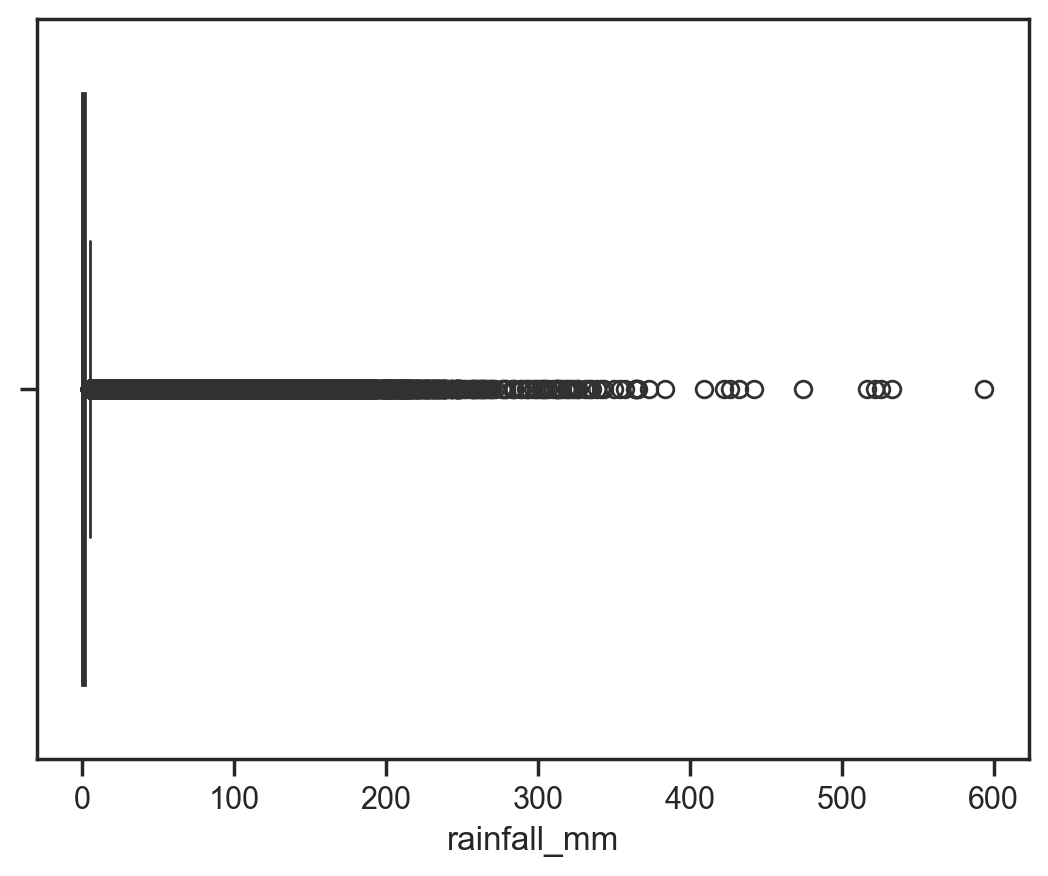

In [64]:
# df_MH_precipitation['rainfall_mm'].plot()
sns.boxplot(df_MH_precipitation['rainfall_mm'], orient='h')

<Axes: xlabel='rainfall_mm'>

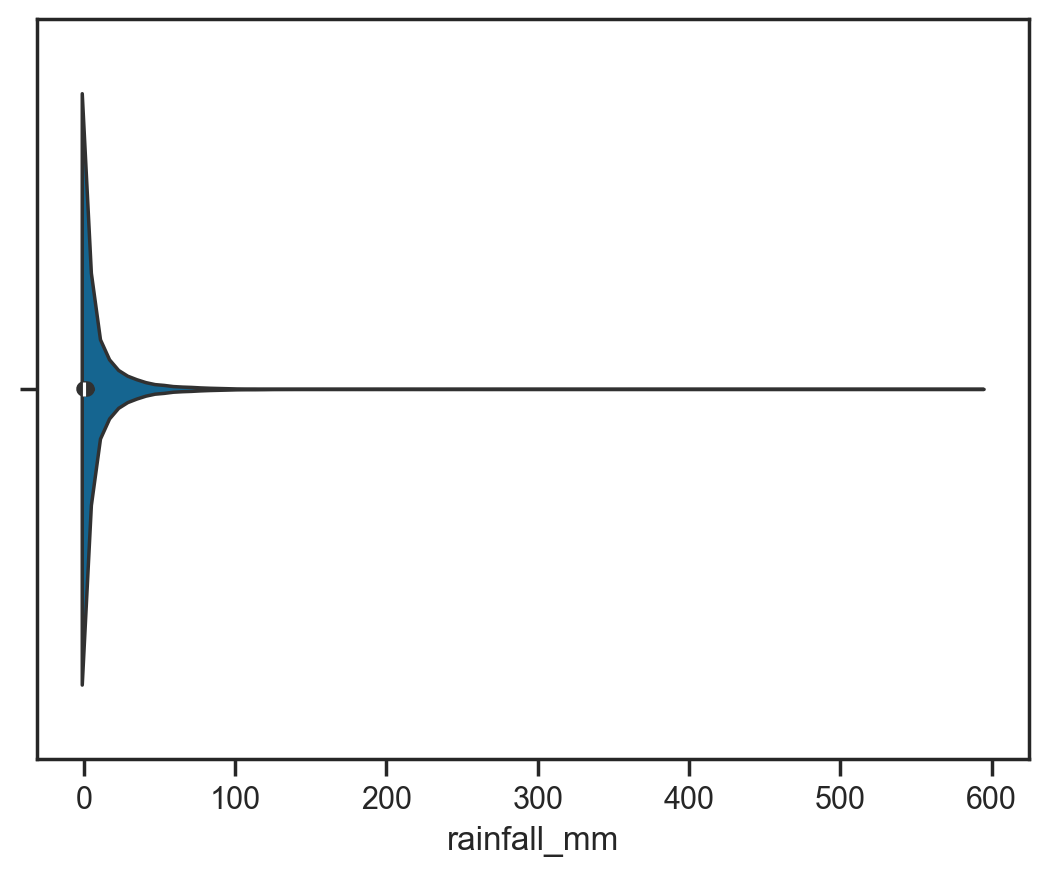

In [37]:
sns.violinplot(df_MH_precipitation['rainfall_mm'], orient='h')

### 1.3.2 Plot year-wise rainfall -> X-axis is date, Y-axis is rainfall

<Axes: xlabel='date', ylabel='rainfall_mm'>

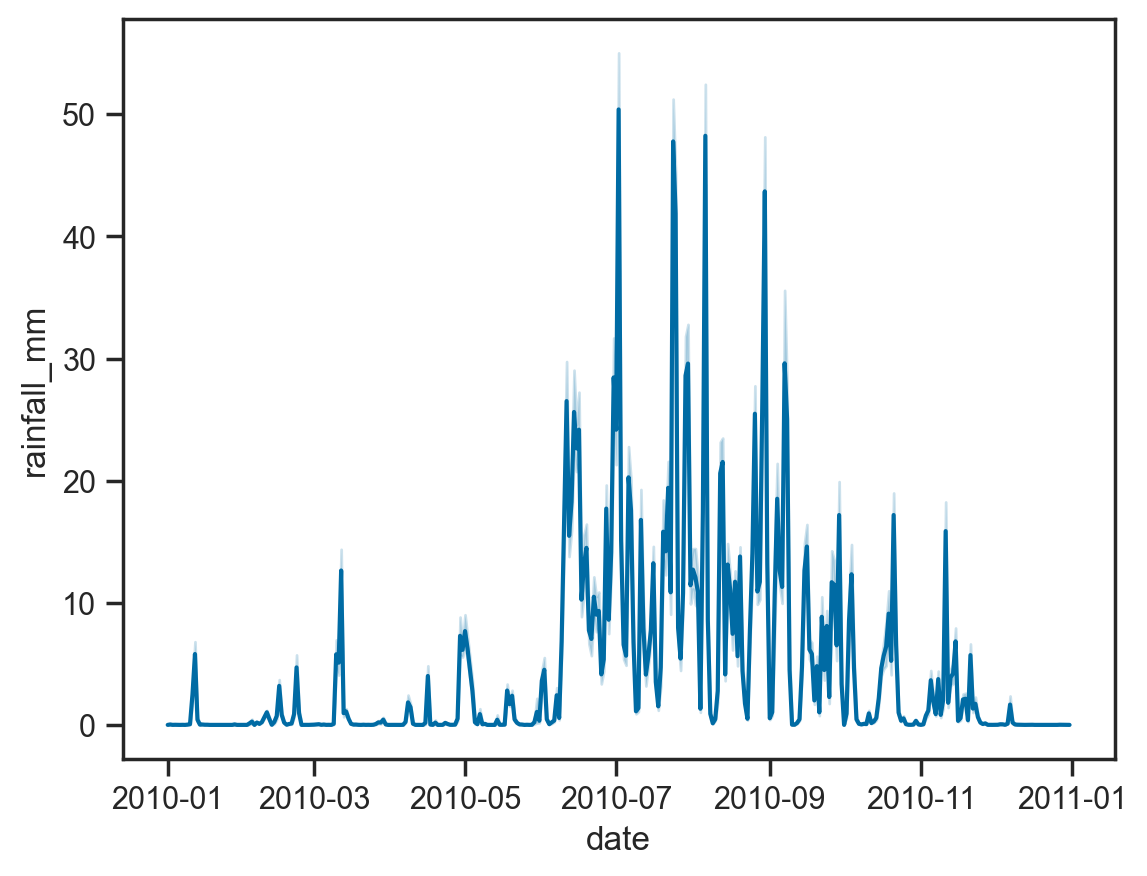

In [77]:
# 2010 year
mask = (df_MH_precipitation['date'] >= '2010-01-01') & (df_MH_precipitation['date'] <= '2010-12-31')
sns.lineplot(df_MH_precipitation[mask], x='date', y='rainfall_mm')

- We can observe that rainfall is high b/w June to September
- Let us compare it every year by year by drawing.

<Figure size 1600x800 with 0 Axes>

<Axes: xlabel='date', ylabel='rainfall_mm'>

<Axes: xlabel='date', ylabel='rainfall_mm'>

<Axes: xlabel='date', ylabel='rainfall_mm'>

<Axes: xlabel='date', ylabel='rainfall_mm'>

<Axes: xlabel='date', ylabel='rainfall_mm'>

<Axes: xlabel='date', ylabel='rainfall_mm'>

<Axes: xlabel='date', ylabel='rainfall_mm'>

<Axes: xlabel='date', ylabel='rainfall_mm'>

<Axes: xlabel='date', ylabel='rainfall_mm'>

<Axes: xlabel='date', ylabel='rainfall_mm'>

<Axes: xlabel='date', ylabel='rainfall_mm'>

<Axes: xlabel='date', ylabel='rainfall_mm'>

<Axes: xlabel='date', ylabel='rainfall_mm'>

<Axes: xlabel='date', ylabel='rainfall_mm'>

<Axes: xlabel='date', ylabel='rainfall_mm'>

Text(0.5, 1.0, 'Rainfall (2010–2024)')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Rainfall (mm)')

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_75068/2197083089.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


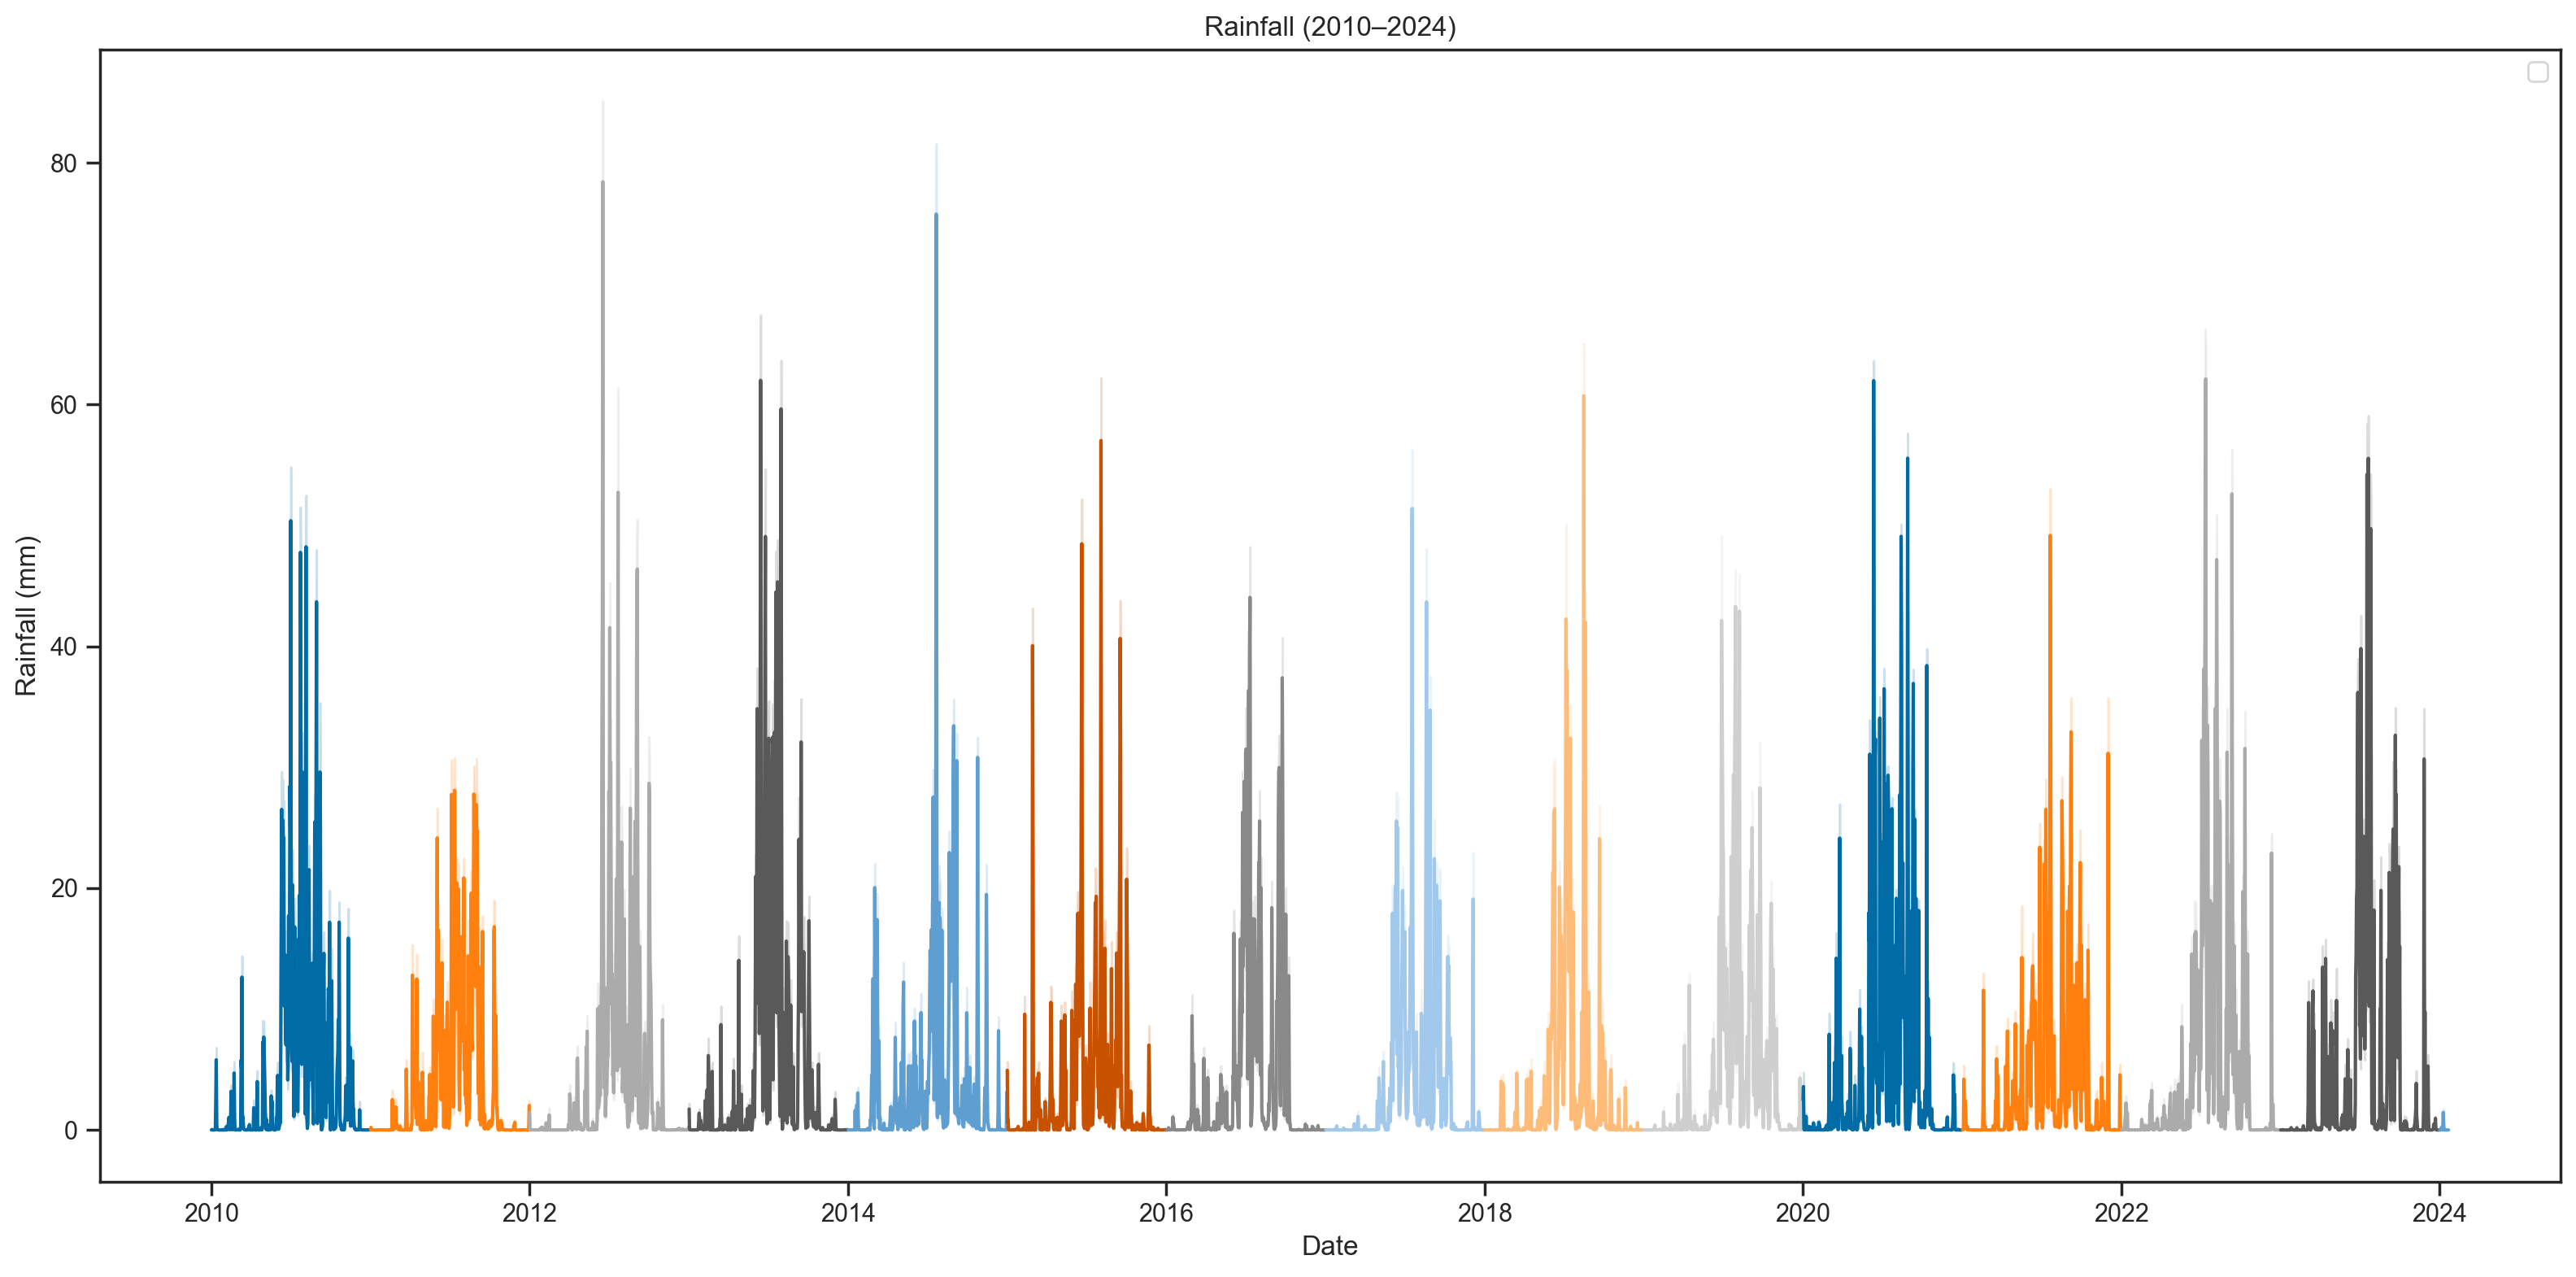

In [83]:
# 2010 to 2024 year
plt.figure(figsize=(16, 8))  # Increase overall figure size
for year in range(2010, 2025):
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    mask = (df_MH_precipitation['date'] >= start_date) & (df_MH_precipitation['date'] <= end_date)
    sns.lineplot(df_MH_precipitation[mask], x='date', y='rainfall_mm')

plt.title("Rainfall (2010–2024)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.tight_layout()
plt.show()

- The seasonal pattern is almost same in every year except 2011 where we see pretty less rainfall.

Text(0, 0.5, '2010')

Text(0, 0.5, '2011')

Text(0, 0.5, '2012')

Text(0, 0.5, '2013')

Text(0, 0.5, '2014')

Text(0, 0.5, '2015')

Text(0, 0.5, '2016')

Text(0, 0.5, '2017')

Text(0, 0.5, '2018')

Text(0, 0.5, '2019')

Text(0, 0.5, '2020')

Text(0, 0.5, '2021')

Text(0, 0.5, '2022')

Text(0, 0.5, '2023')

IndexError: index 14 is out of bounds for axis 0 with size 14

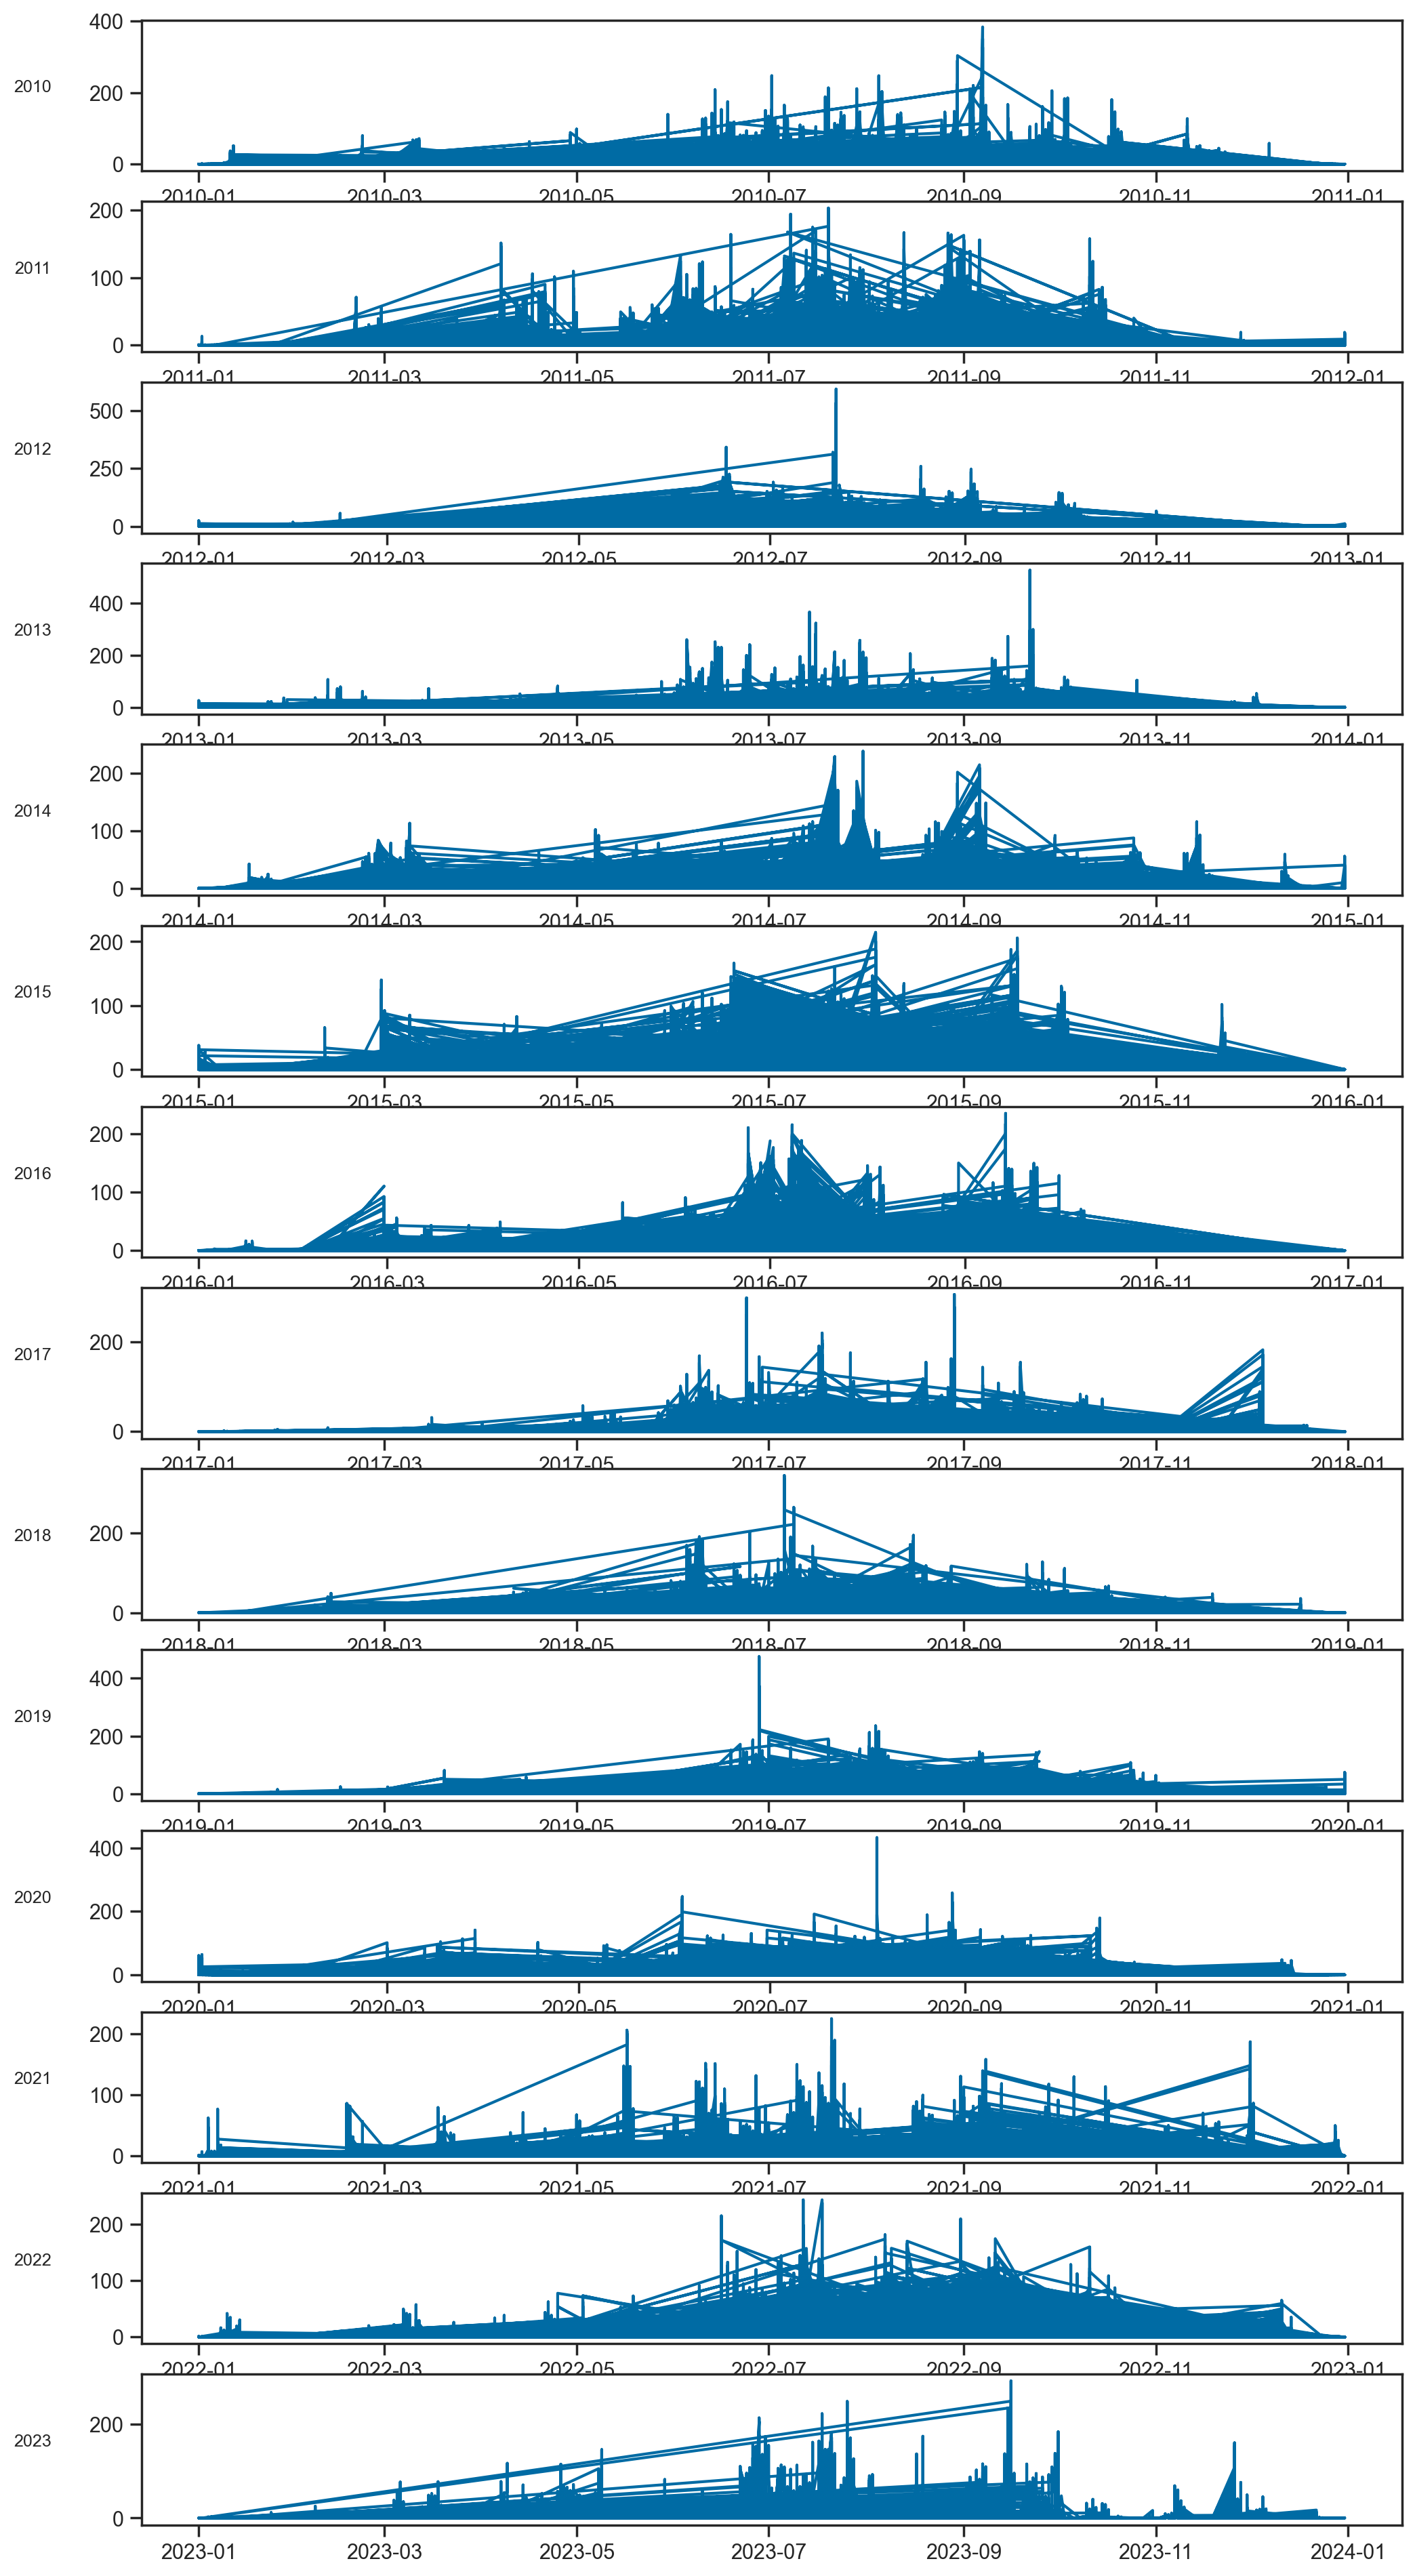

In [82]:
# 2010 to 2024 year
fig, axes = plt.subplots(nrows=14, ncols=1, figsize=(12, 24))

# Plot each year's data
for idx, year in enumerate(range(2010, 2025)):
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    
    mask = (df_MH_precipitation['date'] >= start_date) & (df_MH_precipitation['date'] <= end_date)
    yearly_df = df_MH_precipitation[mask]
    
    ax = axes[idx]
    ax.plot(yearly_df['date'], yearly_df['rainfall_mm'])
    ax.set_ylabel(str(year), rotation=0, labelpad=30, fontsize=9)
    # ax.grid(True)

# Set x-axis label on the bottom subplot
axes[-1].set_xlabel("Date")
fig.suptitle("Rainfall in Maharashtra (2010–2024)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [65]:
pd.read_csv('../data/raw/MH_temperature.csv')

,Unnamed: 0,State,District,Reg_id,date,mean,max,min
0,0,Madhya Pradesh,BHANDARA,6005,2024-01-21,21.903467,27.377283,16.894617
1,1,Madhya Pradesh,AHMEDNAGAR,1013,2024-01-21,20.649530,27.027185,15.584162
2,2,Madhya Pradesh,AHMEDNAGAR,1012,2024-01-21,21.548273,27.747492,16.029505
3,3,Madhya Pradesh,AHMEDNAGAR,1011,2024-01-21,19.963617,26.506220,14.858789
4,4,Madhya Pradesh,AHMEDNAGAR,1010,2024-01-21,20.795527,27.048334,15.648554
...,...,...,...,...,...,...,...,...
602635,602635,Madhya Pradesh,WASHIM,3001,2019-05-01,36.305534,42.001305,28.688684
602636,602636,Madhya Pradesh,WASHIM,3002,2019-05-01,35.228570,41.048515,27.523280
602637,602637,Madhya Pradesh,WASHIM,3003,2019-05-01,35.690147,41.413994,28.063684
602638,602638,Madhya Pradesh,WASHIM,3004,2019-05-01,36.100180,41.791620,28.420710


In [54]:
pd.read_csv('../data/raw/MP_temperature.csv')

,Unnamed: 0,State,District,Reg_id,date,mean,max,min
0,0,Madhya Pradesh,SHEOPUR,3005,2024-01-21,11.647852,18.707727,6.006525
1,1,Madhya Pradesh,SHIVPURI,4001,2024-01-21,12.036219,19.538660,5.848382
2,2,Madhya Pradesh,SHIVPURI,4002,2024-01-21,11.872766,19.023554,5.806268
3,3,Madhya Pradesh,SHIVPURI,4003,2024-01-21,11.977747,19.224482,6.273920
4,4,Madhya Pradesh,SHIVPURI,4004,2024-01-21,12.835993,19.057306,7.577936
...,...,...,...,...,...,...,...,...
730430,730430,Madhya Pradesh,ASHOKNAGAR,4003,2019-05-01,34.909843,40.841760,28.083887
730431,730431,Madhya Pradesh,BHIND,8002,2019-05-01,34.223625,41.351310,25.595880
730432,730432,Madhya Pradesh,SEHORE,9001,2019-05-01,33.994560,39.823967,26.527735
730433,730433,Madhya Pradesh,RAISEN,3002,2019-05-01,33.775840,40.512870,24.470453


In [56]:
pd.read_csv('../data/raw/MP_precipitation.csv')

,Unnamed: 0,State,District,Reg_id,date,rainfall_mm
0,0,Madhya Pradesh,AGAR MALWA,1002,2010-01-01,0.0
1,1,Madhya Pradesh,AGAR MALWA,1003,2010-01-01,0.0
2,2,Madhya Pradesh,ALIRAJPUR,2001,2010-01-01,0.0
3,3,Madhya Pradesh,ALIRAJPUR,2002,2010-01-01,0.0
4,4,Madhya Pradesh,ALIRAJPUR,2003,2010-01-01,0.0
...,...,...,...,...,...,...
2457305,2457305,Madhya Pradesh,KHARGONE,1011,2024-01-13,0.0
2457306,2457306,Madhya Pradesh,NIWARI,2001,2024-01-13,0.0
2457307,2457307,Madhya Pradesh,NIWARI,2002,2024-01-13,0.0
2457308,2457308,Madhya Pradesh,NIWARI,2003,2024-01-13,0.0


# 2. Crop Performance Analysis: 

# 3. Economic Impact: 

# 4. Infrastructure and Technology Assessment: 

# 5. Government Policies and Support Programs: 

# 6. Recommendations

In [5]:
a


NameError: name 'a' is not defined